In [15]:
#그래프설정+

import numpy as np
import pandas as pd
#import xlwings as xw
import logging
from datetime import datetime
from datetime import timedelta
#from tabulate import tabulate
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.unicode_minus"] = False
fpath = "c:/Windows/Fonts/malgun.ttf"
try:
    font_name = fm.FontProperties(fname=fpath).get_name()
    matplotlib.rc('font', family=font_name)
    print('i am windows, font %s installed'%font_name)
except:
    try:
        fpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_name = fm.FontProperties(fname=fpath, size=18).get_name()
        matplotlib.rc('font', family=font_name)
        print('i am linux, font %s installed'%font_name)
    except:
        font_name = u'AppleGothic'
        plt.rcParams['font.family'] = font_name #u'Gulim'
        print('i am apple, font %s installed'%font_name)

i am linux, font NanumGothic installed


### 배열만들고 이용하기  
- 파이썬 고유 배열: [] 로 둘러쌓임. 원소는 모두 가능. <br>
- numpy 배열: np.array( ). 원소는 **숫자, 문자 그리고 같은 크기의 이들 배열**이 가능. <br>
---
```
[1, 2, 5] + [7,8,9] ==> [1,2,5, 7,8,9]
a = [1,2,5]; a.append(4); a ==> [1,2,5,4] #다음 줄에 쓰는 대신 ; 사용 가능
[1, 2, 3] + 4 ==> error

np.array([1,2,3]) + 4 ==> np.array([5,6,7])
np.array([1,2,5]) + np.array([7,8,9]) ==> np.array([8, 10, 14])
같은 크기의 이들 배열: 
np.array([ [1,2,5], [7,8,9] ]) 

등 간격 배열 만들기
dx=1 <-- step size
np.arange(0, 5+dx, dx) ==> array([0., 1., 2., 3., 4., 5.])
n=5 <-- node number
np.linspace(0, 5, n+1) ==> array([0., 1., 2., 3., 4., 5.])

배열의 길이, 차원
len()  <-- 함수
.shape  <-- 속성
```

In [19]:
dx=1.0; np.arange(0, 5+dx, dx)
np.linspace(0, 5, 6)

array([0., 1., 2., 3., 4., 5.])

In [4]:
#현금흐름을 정의, 리스트를 이용함
cfs = [-100, 10, 14, 12, 13, 15, 17, 18, 19, 20]
times = [0,1,2,3,4,5,6,7,8,9]
#rate = 0.05
rate = 0.06244847

#solution)
#만기에 따른 할인함수 계산(고정 이자율 rate를 사용)
disc = []
#for문 + 리스트를 이용하여 순차적으로 계산하여 disc라는 리스트에 붙인다.
for t in times:
    d = 1/(1+rate)**t #변수중 하나라도 소수점이 있는 실수이면 실수로 계산됨
    disc.append(d)
print ( f'disc= {disc}') #f-string
print ( '----------------' )
pv = 0
for (c,d) in zip(cfs,disc): #zip의 사용법
    pv = pv+c*d
    print (f'{c*d:8.5f},  {pv:8.5f}')


disc= [1.0, 0.9412221187536747, 0.8858990768311563, 0.8338278060969454, 0.7848171743302951, 0.7386872836574324, 0.6952688102204452, 0.6544023826590339, 0.6159379971237888, 0.5797344666737473]
----------------
-100.00000,  -100.00000
 9.41222,  -90.58778
12.40259,  -78.18519
10.00593,  -68.17926
10.20262,  -57.97663
11.08031,  -46.89633
11.81957,  -35.07676
11.77924,  -23.29751
11.70282,  -11.59469
11.59469,  -0.00000


In [5]:
#pv=0가되는 rate를 구하려면? fsolve를 이용함.
#rate가 입력되면 pv가 나오는 함수를 만들고 
#만든 함수의 결과값에 제시한 pv를 빼서 맞는 rate가 들어오면 0가 되게 함
import numpy as np
from scipy.optimize import fsolve

def ZeroPV(r, times, cfs, pv=0):
    temp=0
    for t,c in zip(times,cfs):
        d = 1/(1+r)**t 
        temp = temp+c*d #c<-현금흐름, d<-할인율
    return temp-pv

r = fsolve(ZeroPV, 0.05, args=(times,cfs))
print ('r= ', r)
    
r = fsolve(ZeroPV, 0.05, args=([0,1,2],[-100,50,75]))

#>> r=  [0.06244847] <==해가 여럿일 수 있기 때문에 배열을 리턴

r=  [0.06244847]


In [7]:
#fsolve의 입력함수는 간단한 경우 lambda function을 사용
#example
F = lambda x: x**2  - 4
x = fsolve(F, 1)
x

array([2.])

### 고정수익증권(채권)
Fixed Income Securities <br>
$\square$ Traditionally, the term fixed income securities refers to securities whose cashflows are fixed in advance and whose values therefore depend largely on the current level of interest rates. The classic example of a fixed income security is a bond which pays a fixed coupon every period until expiration when the final coupon and original principal is paid. <p>

$\square$ A stock, on the other hand, is the classic example of a non-fixed income security (or variable-income security) as the dividend payments (if they exist) and stock value vary stochastically through time. It should be mentioned, however, that since interest rates vary stochastically through time, so too do bond prices. <p>

Furthermore, many securities (e.g., convertible bonds) have fixed-income and non-fixed-income characteristics so the distinction is often blurred. <p>

In [36]:
#채권가격의 평가함수
#문서를 참조하여 코딩을 채우시오

def BondPricefromYTM(face, ytm, coupon, freq, numcfs):
    return 0

def BondDurationfromYTM(face, ytm, coupon, freq, numcfs, ismod=True):
    return 0

def BondConvexityfromYTM(face, ytm, coupon, freq, numcfs):
    return 0


In [37]:
face=1000
ytm = 0.08
coupon=0.05
freq=1
numcfs=3
BondPricefromYTM(face, ytm, 
                 coupon, freq, numcfs)
1/0.85-1

0.17647058823529416

In [39]:
#Example 4 (Immunizing a Cash Flow)
#   액면, YTM, Coupon, Freq, Numcf=Freq*Years
oblig = [100, 0.08, 0.00, 1, 7]
bond1 = [1  , 0.08, 0.07, 1, 6]
bond2 = [1  , 0.08, 0.10, 1, 6]
bond3 = [1  , 0.08, 0.02, 1, 9]

def BondCalc(x):
    #채울 것

p0, d0, c0 = BondCalc(oblig)
u1, d1, c1 = BondCalc(bond1)
u2, d2, c2 = BondCalc(bond2)
u3, d3, c3 = BondCalc(bond3)

print (p0, d0, c0)
print (u1, d1, c1)
print (u2, d2, c2)
print (u3, d3, c3)

#ui is bond unit price


58.349039526213375 6.481481481481482 65.31840000000001
0.9537712033603878 4.699908622339534 39.05395894296115
1.0924575932792235 4.488379244396924 36.597909996633
0.6251867253485941 7.499004428911535 91.26265095910952


In [65]:
import numpy as np
A  = np.array( [ [1,1,1 ],[d1,d2,d3 ],[c1,c2,c3 ] ] )
B  = np.array([p0, p0*d0, p0*c0 ])
X = np.linalg.solve(A, B)
print ('X=', X)
print ('----------------\n')
print ('P0=', X.sum())
print ('----------------\n')
print ('A*X=', A*X)
print ('----------------\n')
print ('B=', B)
print ('----------------\n')
bondprices = X
bondfaces = X/[u1, u2, u3]
print ('bondprice= ', bondprices)
print ('bondface= ', bondfaces)

X= [-4058.49094892  3900.8923123    212.30206111]
----------------

P0= 54.703424484331265
----------------

A*X= [[  -4058.49094892    3900.8923123      212.30206111]
 [ -19074.53660454   17508.68408916    1592.05409652]
 [-158500.13888969  142764.50575215   19375.24890081]]
----------------

B= [  54.70342448   26.20158114 3639.61576327]
----------------

bondprice=  [-4058.49094892  3900.8923123    212.30206111]
bondface=  [-4255.2039049   3570.74941517   339.58184411]


In [41]:
oblig

[100, 0.08, 0.0, 1, 7]

In [69]:
#   액면, YTM, Coupon, Freq, Numcf=Freq*Years
oblig = [100, 0.08, 0.00, 1, 7]
bond1 = [1  , 0.08, 0.07, 1, 6]
bond2 = [1  , 0.08, 0.10, 1, 6]
bond3 = [1  , 0.08, 0.02, 1, 9]
specs = [bond1, bond2, bond3]

def BondPortfolio(specs):
    #채울 것
#----------------------------------
#액면금액 설정
specs[0][0] = X[0]/u1
specs[1][0] = X[1]/u2
specs[2][0] = X[2]/u3
#YTM 재설정
ytm = 0.06
specs[0][1] = ytm
specs[1][1] = ytm
specs[2][1] = ytm
#----------------------------------
#print ('specs= ', specs)
print ('==========================')
oblig[1] = ytm
print ('price,       duration,       convexity')
temp = [f'{x:.3f}' for x in BondPortfolio(oblig)]
print(f'{",          ".join(x for x in temp)}')
temp = [f'{x:.3f}' for x in BondPortfolio(specs)]
print(f'{",          ".join(x for x in temp)}')
#>> specs=  [[-4255.203904904673, 0.06, 0.07, 1, 6], 
#                [3570.749415171064, 0.06, 0.1, 1, 6], 
#                [339.5818441118224, 0.06, 0.02, 1, 9]]

price,       duration,       convexity
66.506,          6.604,          62.922
55.837,          1.634,          87.881


Text(0, 0.5, 'convexity')

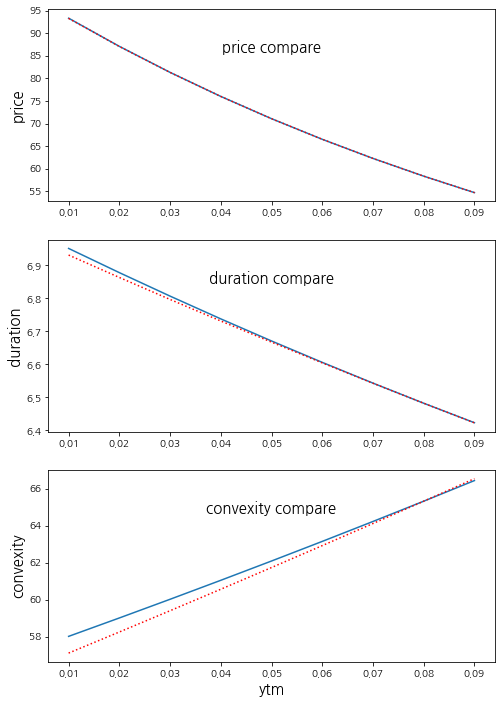

In [50]:
#원래의 부채와 포트폴리오의 시장 YTM 변화에 따른 가격, 듀레이션, 컨벡서티 비교
ytms = []
prices = []
durats = []
convex = []
prices0 = []
durats0 = []
convex0 = []
#문서대로 코드를 채워서 그림을 완성하시오


In [37]:
specs = np.matrix([bond1, bond2, bond3])
specs[:,0] = X[:,0]
specs[:,1] = 0.07
specs

matrix([[  3.14712874e+02,   7.00000000e-02,   7.00000000e-02,
           1.00000000e+00,   6.00000000e+00],
        [ -2.72880199e+02,   7.00000000e-02,   1.00000000e-01,
           1.00000000e+00,   6.00000000e+00],
        [  1.65163644e+01,   7.00000000e-02,   2.00000000e-02,
           1.00000000e+00,   9.00000000e+00]])

In [46]:
oblig

(100, 0.08, 0.0, 1, 7)

In [9]:
#포트폴리오 만들기
#각 채권의 스펙을 리스트로 정리
spec1 = [100, 0.035, 0.032, 4, 40] #10yr 3.2%, 100
spec2 = [50 , 0.044, 0.040, 2, 40] #20yr 4.0%,  50
spec3 = [80 , 0.027, 0.028, 4, 20] # 5yr 2.8%,  80
spec4 = [20 , 0.030, 0.030, 4, 28] # 7yr 3.0%,  20
spec5 = [100, 0.037, 0.033, 2, 20] #10yr 3.3%,  60

specs = [spec1, spec2, spec3, spec4, spec5]

print ('price, duration, convexity')
for s in specs:
    p = BondPricefromYTM(s[0],s[1],s[2],s[3],s[4])
    d = BondDurationfromYTM(s[0],s[1],s[2],s[3],s[4])
    c = BondConvexityfromYTM(s[0],s[1],s[2],s[3],s[4])

    #print p, d, c
    print ('{:6.2f}, {:6.2f}, {:6.2f}'.format(p, d, c))



price, duration, convexity
 97.48,   8.57,  84.75
 47.36,  13.76, 255.91
 80.37,   4.68,  24.38
 20.00,   6.34,  45.09
 96.68,   8.57,  88.42


### 할인함수와 제로커브, 선도커브  

- 만기에 따른 할인채권의 단위가격을 의미함. 제로금리는 할인채권의 이자율(YTM)을 의미하고 이를 연결한 곡선을 제로커브라 한다.    

- 이표채 또는 이자율 스왑의 만기별 금리 테이블 $\rightarrow$ 부스트레핑 과정 $\rightarrow$ 할인함수 생성  

- 이표채의 고시된 YTM을 이자지급주기를 가정(보통 6개월)하고 이 간격으로 선형보간을 이용하여 채워 넣는다.   

- 첫번째 만기부터 순서대로 채권을 Par Coupon Bond로 가정하고 구두끈 엮듯이 할인율을 구해나간다.  

- 최종결과는 시간이 주기(예 6개월)간격으로 채워진 시간축위의 할인율이다. 연속복리로 이자율(제로금리)를 표현한 경우   

\begin{equation}
D(t) = e^{-z(t) \,t}
\end{equation}


- 할인채권의 가격 $\rightarrow$ 년복리 기준으로 YTM추출 $\rightarrow$ 비어있는 YTM은 선형보간 $\rightarrow$ 원하는 시점의 할인율 구함


### 구간할인율 $d_{1,2}$의 이해

- 구간할인율 $d_{1,2}$은 단위원금 1 시점 $t_1$발행, $t_2$만기인 선도할인채권과 같다. <p>

- 아래의 두 투자전략 (1), (2)의 가치가 동등하기 위한 $x$의 값은? <p>
    > (1) 시점 $t_2$만기인 할인채권을 1단위 매입. (가격 $d_2$) <p>
    > (2) 시점 $t_1$만기인 할인채권을 $x$단위 매입. (가격 $x d_1$),  시점 $t_1$발행, $t_2$만기인 선도할인채권을 가격 $x$에 1단위(=원금 1) 매입하는 선도계약을 맺음. <p>
        
- 펀딩(지출)비용 (1)과 (2)가 같아야 하므로 
\begin{equation*}
        d_2 = x d_1 \Rightarrow x = \frac{d_2}{d_1} := d_{1,2} 
\end{equation*}        

#### Par Bond
만기수익률(YTM)과 쿠폰금리(Coupon Rate)가 같을 경우 채권의 가격은 항상 액면가격과 같아진다. 이를 Par Bond라 한다.
국고채권의 경우 발행시 쿠폰금리를 시장의 만기수익률(YTM)에 맞추어 발행을 많이한다. <p>
- Discount Factor from Par Bond 
\begin{align*}
\left( 1+ c_1 \right) d_1 &= 1 \\
c_1*d_1 + \left( 1+ c_2 \right) d_2 &= 1 \\
c_1*d_1 + c_2*d_2 + \left( 1+ c_3 \right) d_3 &= 1 \\
\vdots  \\
c_1*d_1 + \cdots + c_{n-1}*d_{n-1} + \left( 1+ c_n \right) d_n &= 1
\end{align*} <p>

예제) 만기에 따른 Par Bond로 할인율(함수) 구하기  
(1년: y1), (2년: y2), ... , (10년: y10)과 같이 YTM이 형성이 되어 있을 때 각 만기별 할인율을 구하는 식을 세우시오


 t: 0.25,  rate:0.020 
 t: 1.00,  rate:0.022 
 t: 2.00,  rate:0.025 
 t: 3.00,  rate:0.028 
 t: 4.00,  rate:0.033 
 t: 5.00,  rate:0.040 
 t: 6.00,  rate:0.045 
 t: 7.00,  rate:0.050 
 t: 8.00,  rate:0.055 
 t: 9.00,  rate:0.057 
 t:10.00,  rate:0.060 
 t:11.00,  rate:0.062 


,ytm,zero,forward3m,discount
0.25,0.020000,0.020151,0.020000,0.995025
0.50,0.020667,0.020829,0.021337,0.989745
0.75,0.021333,0.021509,0.022678,0.984166
1.00,0.022000,0.022192,0.024023,0.978290
1.25,0.022750,0.022961,0.025796,0.972022
1.50,0.023500,0.023733,0.027322,0.965428
1.75,0.024250,0.024508,0.028855,0.958513
2.00,0.025000,0.025285,0.030395,0.951285
2.25,0.025750,0.026066,0.031944,0.943748
2.50,0.026500,0.026849,0.033502,0.935909


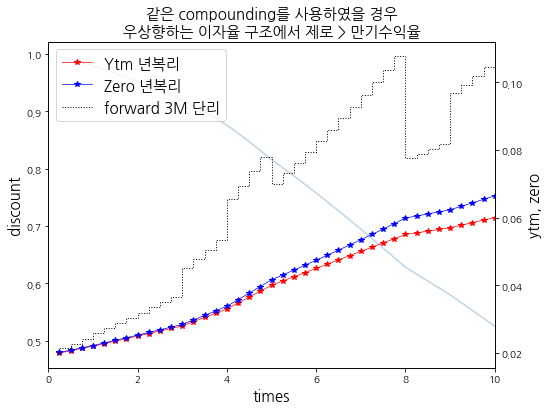

In [70]:
#BOOSTRAPPING Python Code
#3m 주기  스왑금리 설정
rates = np.array( [2, 2.2, 2.5, 2.8, 3.3, 4, 4.5, 5, 5.5, 5.7, 6, 6.2] )/100.0
times = np.array(  [0.25] +  [i for i in range(1, len(rates)) ]    )
for t, r in zip(times, rates):
    print(f' t:{t:5.2f},  rate:{r:5.3f} ')
    
freq = 4 #num of coupons per year
perd = 1/freq  #tau
start = times[0]
endt = times[-1]
times2 = np.arange(start, endt+perd, perd)
rates2 = np.interp(times2, times, rates)
discs = []
zeros = []

for i,t in enumerate(times2):
    #cf = rates2[i]*perd
    #채워서 표와 그림이 나오게 완성하시오

### 스왑계약의 손익 계산 (숙제)
위의 예)에 고시된  스왑금리에 따라 A회사는 B회사와 만기 3년, 원금 100억인 스왑 PAY FIXED거래를 체결하였다.  
1년 후 모든 만기에 걸쳐 스왑금리가 2%씩 상승하였다.  A회사의 손익을 계산하여라. 

  만기.       스왑금리,   1년 후     <p>
 0.25,    0.020   --> 0.04  <p>
 1.00,    0.022    --> 0.042 <p>
 2.00,    0.025   --> 0.045  <p>
 3.00,    0.028   --> 0.048   <p>

 힌트) 3개월 변동금리 - 고정금리 2.8%를 지급하는 현금흐름의 현가 <p>
     
 $N\cdot ( 1-d_n - R\cdot annuity ) $ <p>
 $100억 \times \left(  \underbrace{[1-d(2)]}_{\text{Floating}} -  \underbrace{ 2.8\% \cdot 0.25 \cdot [ d(0.25)+d(0.5)+d(0.75)+d(1)+d(1.25)+d(1.5)+d(1.75)+d(2)  ]}_{\text{Fixed}} \right) $
     
- 스왑의 변동금리 Leg의 현가 $1-d_n$: 
     시장에 따라 변하는 할인율 $d_n$이 존재하지만,  
바닐라 이자율 스왑: 양쪽 Leg 모두 원금이 없음.   
     따라서  $R\cdot annuity - (1-d_n) =  \underbrace{ R\cdot annuity+d_n}_{Fixed Coupon Bond} -1 \Rightarrow $ 쿠폰 $R$인 고정이표채권 - 원금과 같음.   <p>
또한 만기가 감소하면 $d_n \rightarrow 1 \Rightarrow 1-d_n \rightarrow 0 $ .
     

[0.02  0.022 0.025 0.028 0.033 0.04  0.045 0.05  0.055 0.057 0.06  0.062]
[0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]
[]
0 1.0
[0.0055]
1 0.9945300845350572
[0.00625 0.00625]
2 0.9876116143817698
[0.007 0.007 0.007]
3 0.9792701172865762
[0.00825 0.00825 0.00825 0.00825]
4 0.967585769914527
[0.01 0.01 0.01 0.01 0.01]
5 0.9511980437018026
[0.01125 0.01125 0.01125 0.01125 0.01125 0.01125]
6 0.9345837321775308
[0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
7 0.9158669214568239
[0.01375 0.01375 0.01375 0.01375 0.01375 0.01375 0.01375 0.01375]
8 0.8951453648360111
[0.01425 0.01425 0.01425 0.01425 0.01425 0.01425 0.01425 0.01425 0.01425]
9 0.8788094345692542
[0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015]
10 0.8595379150316351
[0.0155 0.0155 0.0155 0.0155 0.0155 0.0155 0.0155 0.0155 0.0155 0.0155
 0.0155]
11 0.8418078242567107


Text(0, 0.5, 'discount')

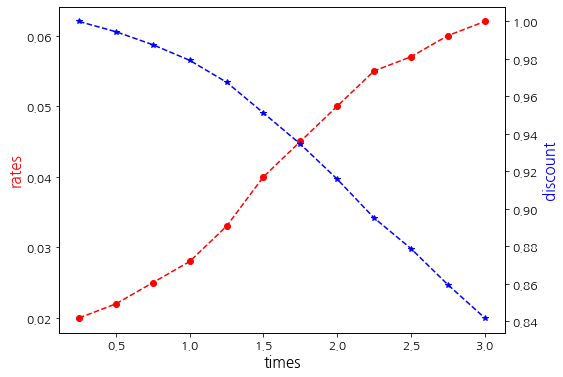

In [57]:
import numpy as np
#assume rates is ytm of par bond
rates = np.array([2, 2.2, 2.5, 2.8, 3.3, 4, 4.5, 5, 5.5, 5.7, 6, 6.2])/100.0
times = np.arange(1,13)*0.25
freq = 4.
print ( rates)
print ( times)
plt.figure(figsize=(8,6))
plt.plot(times, rates, 'r--o')
plt.ylabel('rates',color='r',fontsize=15)
plt.xlabel('times', fontsize=15)
discs = []
for i,t in enumerate(times):
    r = rates[i]/freq
    cf = np.ones(i)*r
    print (cf)
    price=0
    for j,d in enumerate(discs):
        price += d*cf[j]
    cflast = 1+r
    d = 1-price/cflast
    discs.append(d)
    print( i,d)
   
plt.gca().twinx().plot(times, discs, 'b--*')   
plt.ylabel('discount',color='b',fontsize=15)

#### 숙제  (Constructing a Zero-Coupon Bond; Replication Strategy)
Two bonds, **A and B both mature in ten years** time. **Bond A has a 7%**
coupon and currently sells for 97, while bond **B has a 9%** coupon and currently
sells for 103. The face value of both bonds is 100. Compute the price of a
ten-year zero-coupon bond that has a face value of 100. <p>

--- 
   
- Solution: Hint -- using discount function $df(1),\cdots,df(10)$ <p>
Consider a portfolio that buys negative (i.e., is short) seven bonds of
type B and buys nine of type A. The coupon payments in this portfolio cancel
and the terminal value at t = 10 is 200. The initial cost is $−7 \times 103+9 \times 97 = 152$. 
The cost of a zero with face value equal to 100 is therefore 76. 
(The10-year spot rate, s10, is then equal to 2.78%.

#### 숙제 (Constructing an Immunized Portfolio) 
An insurance company must make a payment of 19,487 in 7 years. The market interest rate is 10%, so the present value of the obligation is 10,000. <p>
The company’s portfolio manager wishes to fund the obligation using 3-year zero-coupon bonds and perpetuities
paying annual coupons. (We focus on zeros and perpetuities to keep
the algebra simple.) How can the manager immunize the obligation?


#### 숙제  (Arbitrage in a 1-Period Model)
Suppose at t = 0 the 1-year, 2-year and 3-year spot rates are given by 10%,
11% and 12%, respectively. One year from now the 1-year, 2-year and 3-year
spot rates will either have increased to [11% 12% 13%] or decreased to [9% 10%
11%]. Note that this example assumes that only parallel movements in the spot
rates can occur.
If we assume continuous compounding, then we can see that the forward
rate, $f_{1,2}$, at $t = 0$ is given by 
    
\begin{equation*} 
    f_{1,2} = \frac{2 \cdot 11\% − 1 \cdot 10\%}{2-1} = 12\% 
\end{equation*} 
    
This forward rate, however, is higher than either of the possible 1-year spot
rates prevailing at $t = 1$ and so there is an arbitrage opportunity. <p>


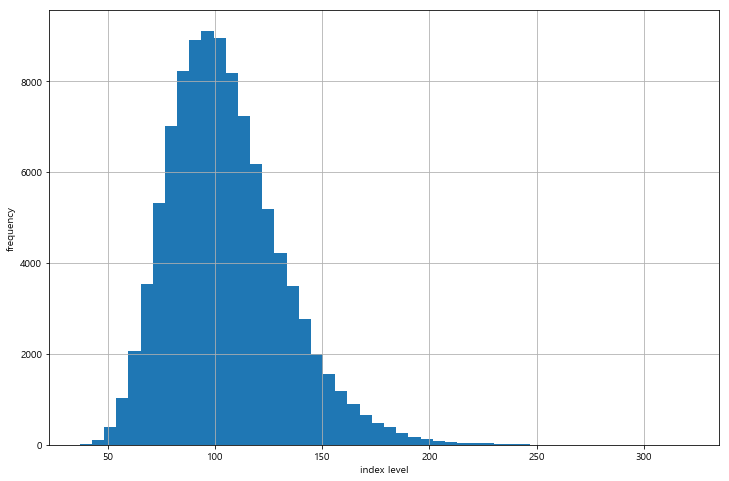

In [2]:
import numpy as np
import numpy.random as npr

S0=100
r=0.05
sigma=0.25
T=1
N=100000
S1 = S0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*npr.standard_normal(N))

plt.hist(S1,bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)



time,      mean,      var
1.0000000, 0.9982655, 1.9992105
0.5000000, 0.5004093, 0.5006069
0.1000000, 0.1001495, 0.0200144
0.0100000, 0.0099904, 0.0001995
0.0010000, 0.0010005, 0.0000020
0.0001000, 0.0000998, 0.0000000
0.0000100, 0.0000100, 0.0000000
0.0000010, 0.0000010, 0.0000000


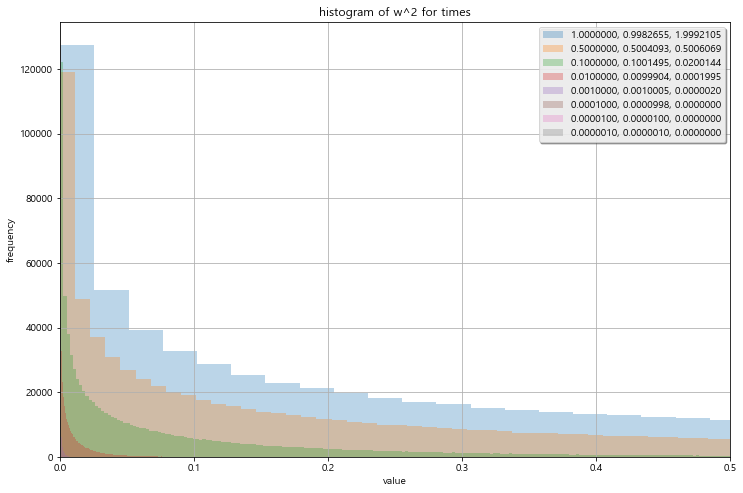

In [35]:
Wt = lambda T,N: np.sqrt(T)*npr.standard_normal(N)
Wt2 = lambda T,N: Wt(T,N)**2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
times = [1,0.5,0.1,0.01,0.001, 0.0001, 0.00001, 0.000001]
print 'time,      mean,      var'
n=1000000
for i,t in enumerate(times):
    X=Wt2(t,n)
    leg = '{:,.7f}, {:,.7f}, {:,.7f}'.format(t, np.mean(X), np.var(X))
    #leg = 'hist of W^2 time={:,.4f}'.format(t)
    print leg
    ax.hist(X, bins=1000, alpha=0.3, label=leg)
ax.set_xlim(0,0.5)
ax.legend(loc='upper right', shadow=True)
ax.set_title('histogram of w^2 for times')
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

\begin{gather}
 \begin{bmatrix} \frac{dS_1}{S_1} \\  \frac{dS_2}{S_2} \\ \vdots \\ \frac{dS_n}{S_n} \end{bmatrix} 
 = rdt +
  \begin{bmatrix}
   \sigma_{1,1}, \sigma_{1,2}, \cdots, \sigma_{1,n} \\
   \sigma_{2,1}, \sigma_{2,2}, \cdots, \sigma_{2,n} \\
   \vdots \\
   \vdots \\
   \sigma_{n,1}, \sigma_{n,2}, \cdots, \sigma_{n,n} \\
   \end{bmatrix}
 \cdot
 \begin{bmatrix} dZ_1 \\ dZ_2 \\ \vdots \\ \vdots \\ dZ_n \end{bmatrix} 
\end{gather}
  
$$ \frac{dS_1}{S_1} = rdt +  
\sigma_{1,1} dZ_1 + \sigma_{1,2} dZ_2 + \cdots + 
\sigma_{1,n} dZ_n 
\rightarrow
\frac{dS_1}{S_1} = rdt +  \sigma dZ
$$
 